In [10]:
from solver import BE_solver, energy_conservation
from CollisionOperators import collisions_ann, collisions_sca

import numpy as np
import matplotlib.pyplot as plt

Generating data from the Boltzmann Equation solver 

In [11]:
annihilation = BE_solver(x_span=(0.01,50),y_span=(0.01,50),y_steps=50,J=0,interaction_strength=1,collision_type="annihilation")
xs = annihilation[0]
fs = annihilation[1]
ys = annihilation[2]


Solved BE for (type=annihilation,# y-steps=50)


Formating data from the Botzmann Equation solver

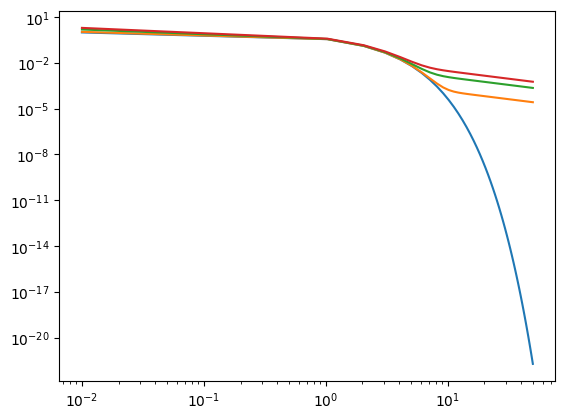

In [12]:
f0 = fs[:,0]
f20 = fs[:,10]
f40 = fs[:,20]
f60 = fs[:,30]

plt.loglog(ys,f0)
plt.loglog(ys,f20)
plt.loglog(ys,f40)
plt.loglog(ys,f60)

Plotting the results from the Boltzmann equation solver

In [13]:
# Plot scattering distribution function and p^2 * f when we start with a random distribution
def random_distribution(y,x):
    return np.random.random()
scattering_random_distribution = BE_solver(x_span=(0.01,50),y_span=(0.01,50),y_steps=100,J=0,interaction_strength=1,collision_type="elastic scattering",initial_condition=random_distribution)

Solved BE for (type=elastic scattering,# y-steps=100)


In [14]:
# format data
xs_random_dist = scattering_random_distribution[0]
fs_random_dist = scattering_random_distribution[1]
ys_random_dist = scattering_random_distribution[2]

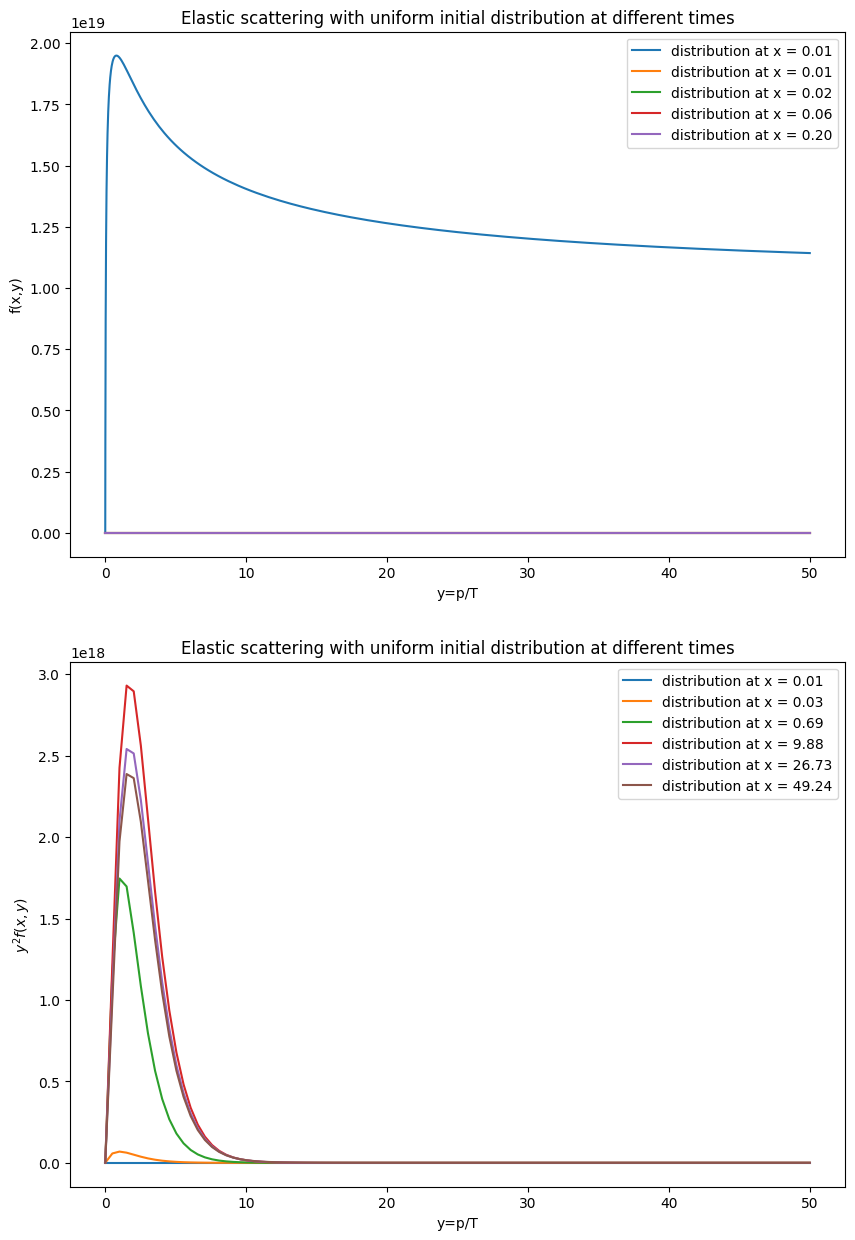

In [15]:
fig, axs = plt.subplots(2,figsize=(10,15))

N = 0.2

for k in range(0,len(ys_random_dist),int(len(ys_random_dist)*N)):
    x = xs_random_dist
    y = [fs_random_dist[k][i] for i in range(len(xs_random_dist))]
    axs[0].plot(x,y,label=f"distribution at x = {xs_random_dist[k]:0.2f}")

axs[0].set_xlabel("y=p/T")
axs[0].set_ylabel("f(x,y)")
axs[0].set_title("Elastic scattering with uniform initial distribution at different times")
axs[0].legend()

for k in range(0,len(xs_random_dist),int(len(xs_random_dist)*N)):
    x = ys_random_dist
    y = [ys_random_dist[i]**2 * fs_random_dist[i][k] for i in range(len(ys_random_dist))]
    axs[1].plot(x,y,label=f"distribution at x = {xs_random_dist[k]:.02f}")

axs[1].set_xlabel("y=p/T")
axs[1].set_ylabel(r"$y^2 f(x,y)$")
axs[1].set_title("Elastic scattering with uniform initial distribution at different times")
axs[1].legend()